<a href="https://colab.research.google.com/github/Danzigerrr/PyTorch-Practice/blob/Neural-Network-Model-1/Neural_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network model

Data - IRIS dataset

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## Create Model Class

In [2]:
class Model(nn.Module):
  def __init__(self, input_features, hidden_1, hidden_2, out_features):
    super().__init__()
    self.fc1 = nn.Linear(input_features, hidden_1)
    self.fc2 = nn.Linear(hidden_1, hidden_2)
    self.out = nn.Linear(hidden_2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



## Create a Model instance

In [3]:
torch.manual_seed(37)

input_features = 4
hidden_1 = 8
hidden_2 = 9
out_features = 3

model = Model(input_features, hidden_1, hidden_2, out_features)

### Import data from csv

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data_url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data_df = pd.read_csv(data_url)
data_df.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


### Data preprocessing

Change last column from strings to integers

In [6]:
data_df['variety'] = data_df['variety'].map({'Setosa':0, 'Versicolor':1, 'Virginica':2})

In [7]:
data_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Create train and test splits

In [8]:
X = data_df.drop('variety', axis=1)  # features
y = data_df['variety']  # labels

convert pandas dataframe to numpy array

In [9]:
X = X.values
y = y.values

In [10]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [11]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

Convert arrays to torch tensors

In [14]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

### Set criterion, optimizer, and learning loss

To measure the error, how far off the preditions are from the ground truth

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Train model

In [16]:
epochs = 100
losses = []

for i in range(epochs):

  # Go forward, get prediction
  y_pred = model.forward(X_train)

  # measure the loss
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # Backpropagation - learn from the errors and fine tune the weights and biases of neurons
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 Loss: 1.1202362775802612
Epoch: 10 Loss: 0.8964323401451111
Epoch: 20 Loss: 0.606863796710968
Epoch: 30 Loss: 0.379395455121994
Epoch: 40 Loss: 0.24443146586418152
Epoch: 50 Loss: 0.14783434569835663
Epoch: 60 Loss: 0.09877770394086838
Epoch: 70 Loss: 0.07791350781917572
Epoch: 80 Loss: 0.06818408519029617
Epoch: 90 Loss: 0.06291275471448898


## Graph losses

Text(0.5, 0, 'epoch')

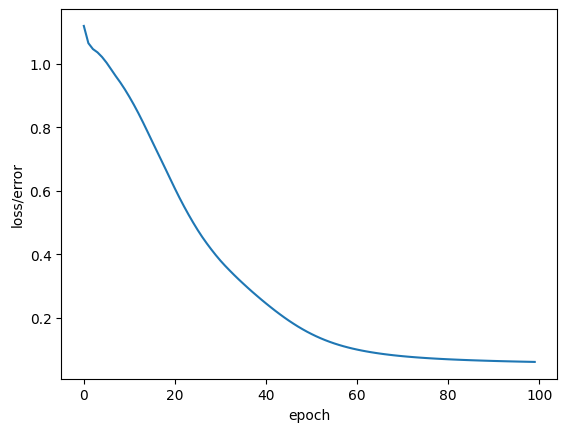

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

## Evaluation of the Model

See loss on the test data

In [24]:
# turn of calculation of gradients
with torch.no_grad():
  y_eval = model.forward(X_test)  # features from the test set
  loss = criterion(y_eval, y_test)  # calculate the loss by comparing to target values in test set
print(loss)

Accuracy: 1.0


Calculate accuracy

In [26]:
correct = 0
with torch.no_grad():  # turn of calculation of gradients
  for i, data in enumerate(X_test):
    y_val = model.forward(data)  # features from the test set

    if y_val.argmax().item()==y_test[i]:
      correct += 1

accuracy = correct / len(y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0
